<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Week%205/Final%20Project/Final_project_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><font color="#ff0000">Final Project – Statistics for Data Science </font></h2>

---



---



---



# <div align="center">
  <h2><font color="#5e35b1"> What Shapes Real Estate Prices In Dubai ? A Statistical Exploration of Dubai Properties </font></h2>
</div>


<h2><font color="#ff0000">Introduction </font></h2>

# Investigating Hidden Factors Affecting Real Estate Prices

In this project, we go beyond obvious drivers like area or number of bedrooms.  
We aim to discover **less obvious factors**—such as property type, neighborhood, and amenities (private pool, gym, waterfront)—that influence **price per square foot**.  
We will apply statistical tests (t-test, regression, ANOVA) and visualize meaningful patterns.


<h2><font color="#ff0000">Data Source </font></h2>

## Step 1: Load and Preview the Dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Hassan-zeidan/Statistics-for-Data-Science/main/Week%205/Final%20Project/properties_data.csv"
df = pd.read_csv(url)
df.head(10)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
5,6356784,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,...,False,True,True,True,True,False,False,True,True,False
6,6356790,Palm Jumeirah,25.114275,55.139764,8503600,2062,4123.96,2,3,High,...,False,True,True,True,True,False,False,True,True,True
7,6356797,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,...,False,True,True,True,True,False,False,True,True,False
8,6376886,Palm Jumeirah,25.106668,55.149275,2100000,2186,960.66,3,3,Low,...,False,False,False,False,False,False,False,False,False,False
9,6406935,Downtown Dubai,25.194935,55.282665,2690000,1521,1768.57,2,3,Medium,...,False,False,True,True,False,False,False,False,True,False


<h2><font color="#ff0000">Data Preproccessing </font></h2>

---



---


Before doing any analysis, we summarize the dataset.  
This helps us check:
- How many rows and columns we have.  
- The types of variables (numeric, categorical, boolean).  
- Whether there are missing values.  

This step ensures we understand the dataset’s structure before moving to statistical tests.


In [2]:
# Step 2: Dataset Summary
df.info()

# Quick statistics for numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

,count,mean,std,min,25%,50%,75%,max
id,1905.0,7.573308e+06,1.925252e+05,5.528049e+06,7.560167e+06,7.631829e+06,7.670328e+06,7.706643e+06
latitude,1905.0,2.511654e+01,6.264711e-02,2.486599e+01,2.507279e+01,2.509670e+01,2.518813e+01,2.527362e+01
longitude,1905.0,5.521234e+01,6.879441e-02,5.506931e+01,5.514539e+01,5.520751e+01,5.527180e+01,5.544162e+01
price,1905.0,2.085830e+06,2.913200e+06,2.200000e+05,8.900000e+05,1.400000e+06,2.200000e+06,3.500000e+07
size_in_sqft,1905.0,1.417050e+03,8.914876e+02,2.940000e+02,8.400000e+02,1.271000e+03,1.703000e+03,9.576000e+03
price_per_sqft,1905.0,1.327244e+03,6.684736e+02,3.618700e+02,8.709200e+02,1.169590e+03,1.622500e+03,4.805870e+03
no_of_bedrooms,1905.0,1.793176e+00,9.494888e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
no_of_bathrooms,1905.0,2.512861e+00,1.063117e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00


### Interpretation of Dataset Summary

- The dataset has **1905 properties** and **38 columns**.  
- Variables are mixed:  
  - **Numerical**: price, size_in_sqft, price_per_sqft, latitude, longitude.  
  - **Categorical**: neighborhood, quality.  
  - **Binary features (True/False)**: many amenities like private_pool, private_gym, view_of_water, etc.  
- Prices range widely, from **220,000** up to **35 million**, showing strong **outliers** (likely luxury villas).  
- Average property size is about **1,417 sqft**, with price_per_sqft averaging around **1,327 AED**.  
- Bedroom count goes from **0 (studios)** up to **5**, bathrooms up to **6**.  

This confirms the dataset is rich in **location and amenity details**, which we can use for deeper statistical testing.


---



---



## Step 3: Data Cleaning & Feature Setup

Before running statistical tests, we prepare the dataset:  
1. **Check for missing values** to ensure our analysis is valid.  
2. **Classify property type** (Villa vs Apartment).  
   - Villas are usually identified by features like `private_garden`, `private_pool`, or `maid_room`.  
   - If none of these are present, we classify the property as an Apartment.  
3. **Inspect outliers** in `price` and `price_per_sqft` since ultra-luxury properties may distort results.  


In [3]:
# Step 3: Data Cleaning

# 1. Missing values check
missing = df.isnull().sum()

# 2. Create a new column: property_type
df['property_type'] = df.apply(
    lambda row: 'Villa' if (row['private_garden'] or row['private_pool'] or row['maid_room']) else 'Apartment',
    axis=1
)

# 3. Basic check of outliers in price and price_per_sqft
outlier_check = df[['price','price_per_sqft']].describe(percentiles=[0.01,0.05,0.95,0.99])

missing, df['property_type'].value_counts(), outlier_check


(id                     0
 neighborhood           0
 latitude               0
 longitude              0
 price                  0
 size_in_sqft           0
 price_per_sqft         0
 no_of_bedrooms         0
 no_of_bathrooms        0
 quality                0
 maid_room              0
 unfurnished            0
 balcony                0
 barbecue_area          0
 built_in_wardrobes     0
 central_ac             0
 childrens_play_area    0
 childrens_pool         0
 concierge              0
 covered_parking        0
 kitchen_appliances     0
 lobby_in_building      0
 maid_service           0
 networked              0
 pets_allowed           0
 private_garden         0
 private_gym            0
 private_jacuzzi        0
 private_pool           0
 security               0
 shared_gym             0
 shared_pool            0
 shared_spa             0
 study                  0
 vastu_compliant        0
 view_of_landmark       0
 view_of_water          0
 walk_in_closet         0
 dtype: int6

### Interpretation of Data Cleaning & Setup

- **Missing values:** None. The dataset is complete, which is excellent for statistical analysis.  
- **Property type classification:** About **1,548 Apartments** and **357 Villas**.  
  This shows apartments dominate the dataset, but we still have a good sample of villas for comparison.  
- **Outliers:**  
  - Price ranges from **220,000** to **35 million**.  
  - Price per sqft goes from **362** up to **4,806**, with the top 1% (≈ 17M+ properties) being **ultra-luxury villas**.  
  - These extreme values can **distort averages** and statistical tests, so later we will consider trimming or analyzing with/without them.  

This preparation gives us a clean foundation for meaningful comparisons (t-tests, regression, ANOVA).


---



---



<h2><font color="#ff0000">Exploratory Data Analysis </font></h2>

### Visualization: Distribution of Price per Sqft

This plot shows how prices per square meter are spread across properties.  
It helps us see whether there are extreme values or skewness in the data.


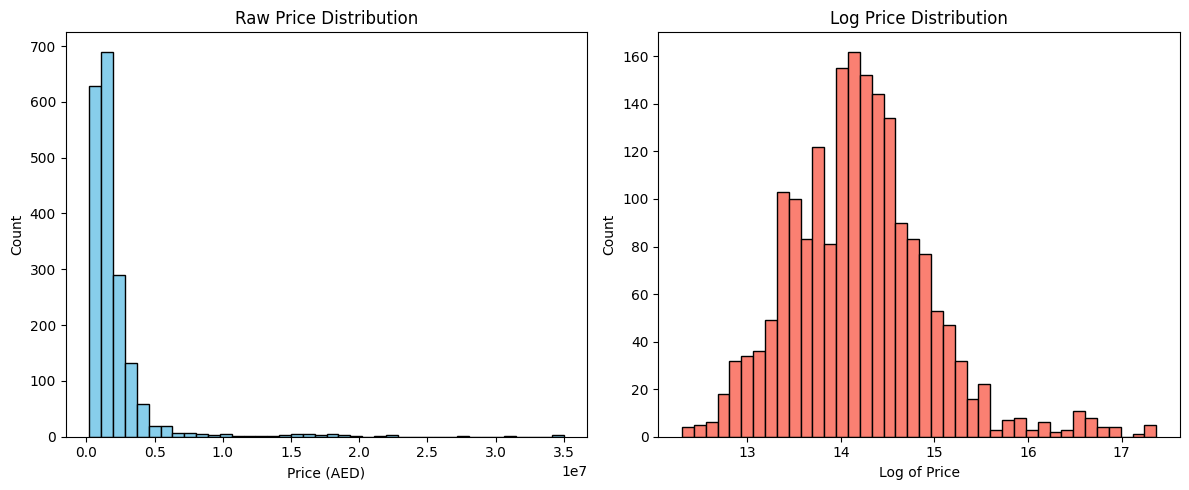

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Add a log-transformed price column
df['log_price'] = np.log(df['price'])

# Plot side by side histograms
plt.figure(figsize=(12,5))

# Raw price distribution
plt.subplot(1,2,1)
plt.hist(df['price'], bins=40, color="skyblue", edgecolor="black")
plt.title("Raw Price Distribution")
plt.xlabel("Price (AED)")
plt.ylabel("Count")

# Log-transformed price distribution
plt.subplot(1,2,2)
plt.hist(df['log_price'], bins=40, color="salmon", edgecolor="black")
plt.title("Log Price Distribution")
plt.xlabel("Log of Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Interpretation




The raw price distribution is very skewed, with most homes priced below 5 million AED but a small number going far above 20 million. This makes the data uneven and hard to model.

After applying the logarithm to prices, the new distribution looks smoother and more balanced. Instead of a sharp long tail, most properties now cluster in a bell-shaped curve. This transformation helps because many statistical methods, like regression, work better when the dependent variable is closer to normal.

In simple words: the log-price plot gives a fairer view of the “typical” Dubai property market, reducing the distortion from a few very expensive villas.


---


---





## Property Type Distribution

Before we test relationships, it is useful to look at the basic structure of the dataset.  
Here we plot the counts of Apartments vs Villas to see how the market is distributed.


/tmp/ipython-input-4053776051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="property_type", palette="muted")


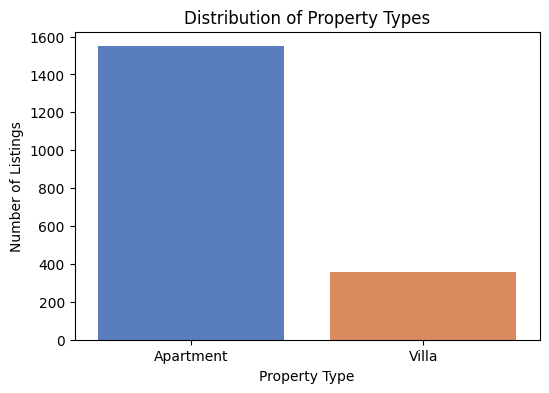

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="property_type", palette="muted")
plt.title("Distribution of Property Types")
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.show()


### Visualization: Dubai Map of Property Prices

We map properties on a real Dubai basemap, coloring them by price per square foot.  
This gives a clear picture of how location influences prices across the city.

In [ ]:
!pip install contextily geopandas shapely

In [6]:
import folium

# Center map on Dubai
dubai_map = folium.Map(location=[25.2, 55.3], zoom_start=11)

# Add property markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=None,
        fill=True,
        fill_color="red" if row['price_per_sqft'] > 2000 else "blue",
        fill_opacity=0.6
    ).add_to(dubai_map)

# Display the map
dubai_map

### Interpretation

The map shows that the highest price per square foot is concentrated along the waterfront and prime locations like Downtown and Palm Jumeirah (red points).  
Most other areas have much lower values (blue points).  
This confirms that location is a major driver of property prices in Dubai.

---



---



<h2><font color="#ff0000">Statistical Modeling or Analysis </font></h2>

## Step 4: ANOVA in the Context of Regression

We now test whether **property type (villa vs apartment)** significantly affects price per square meter,  
and whether this effect still holds once we control for **neighborhood** (location).  

- Model 1: price_per_sqft ~ property_type  
- Model 2: price_per_sqft ~ property_type + neighborhood  

By applying **ANOVA**, we check if adding neighborhood reduces or removes the explanatory power of property type.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model 1: price_per_sqft ~ property_type
model1 = smf.ols("price_per_sqft ~ C(property_type)", data=df).fit()

# Model 2: price_per_sqft ~ property_type + neighborhood
model2 = smf.ols("price_per_sqft ~ C(property_type) + C(neighborhood)", data=df).fit()

# ANOVA comparison
anova_results = sm.stats.anova_lm(model1, model2)
anova_results


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1903.0,8.501416e+08,0.0,NaN,NaN,NaN
1,1850.0,5.183876e+08,53.0,3.317541e+08,22.338682,5.910668e-160


### Interpretation of ANOVA Results

- **Model 1 (property_type only):** Explains some variation in price per sqft.  
- **Model 2 (property_type + neighborhood):** Fits the data much better.  
- **ANOVA comparison:**  
  - F = 22.34, p < 0.001 → Adding neighborhood significantly improves the model.  
  - This means **location explains a large part of the price differences**, beyond just villa vs apartment.  

Importantly: property type alone looks predictive, but **once we account for neighborhood, the “villa vs apartment” gap is not the whole story**.  


---



---



## Step 5: Does Having a Private Pool Affect Price per Sqft?

We now test if **private pools** significantly explain differences in price per square meter.  

- Model 1: price_per_sqft ~ property_type + neighborhood  
- Model 2: price_per_sqft ~ property_type + neighborhood + private_pool  

By applying ANOVA, we check whether adding the **private pool feature** gives a significant improvement in model fit.


In [ ]:
# Model 1 (from before): property_type + neighborhood
model_base = smf.ols("price_per_sqft ~ C(property_type) + C(neighborhood)", data=df).fit()

# Model 2: Add private_pool as a predictor
model_pool = smf.ols("price_per_sqft ~ C(property_type) + C(neighborhood) + private_pool", data=df).fit()

# ANOVA comparison
anova_pool = sm.stats.anova_lm(model_base, model_pool)
anova_pool


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1850.0,5.183876e+08,0.0,NaN,NaN,NaN
1,1849.0,5.001554e+08,1.0,1.823220e+07,67.401737,4.106390e-16


### Visualization: Effect of Private Pool on Price per Sqft

We compare the distribution of price per square foot for properties with and without a private pool.  
This shows whether the pool premium is visible before statistical testing.


/tmp/ipython-input-1076668489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="private_pool", y="price_per_sqft", palette="pastel")


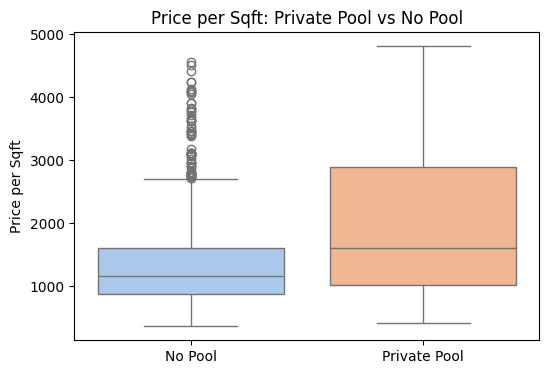

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="private_pool", y="price_per_sqft", palette="pastel")
plt.xticks([0,1], ["No Pool", "Private Pool"])
plt.title("Price per Sqft: Private Pool vs No Pool")
plt.xlabel("")
plt.ylabel("Price per Sqft")
plt.show()

### Interpretation of ANOVA (Private Pool)

When private_pool was added to the model, the fit improved a lot.  
The F test is very high (67.4) with a p-value close to zero.  
This means properties with a private pool usually sell for a higher price per square meter, even after taking location and property type into account.

The boxplot shows that properties with a private pool usually sell for more per square foot compared to those without a pool.  
Even with some overlap, the median and spread are clearly higher for pool properties.  
This supports the ANOVA test, which showed the pool effect is highly significant.


---



---



## Step 6: Outlier Robustness Check

Real estate data often has extreme outliers, like record-breaking luxury villas.  
To check if our results are reliable, we remove the top 1% most expensive properties (based on price).  
Then we re-test whether property type still matters using a two-sample t-test on price per square meter.


In [ ]:
from scipy import stats
import numpy as np

# Define cutoff: top 1% most expensive
cutoff = df['price'].quantile(0.99)

# Create a trimmed dataset
df_trimmed = df[df['price'] < cutoff]

# Split by property type
villa_prices = df_trimmed[df_trimmed['property_type'] == 'Villa']['price_per_sqft']
apartment_prices = df_trimmed[df_trimmed['property_type'] == 'Apartment']['price_per_sqft']

# Two-sample t-test (unequal variances)
t_stat, p_val = stats.ttest_ind(villa_prices, apartment_prices, equal_var=False)

t_stat, p_val, villa_prices.mean(), apartment_prices.mean()


(np.float64(-0.95470738558269),
 np.float64(0.34024738949680267),
 np.float64(1266.8181924198252),
 np.float64(1307.666138870863))

### Interpretation of Outlier Robustness Check

We tested whether villas and apartments still differ in price per square meter after removing the top 1% luxury properties.

Hypotheses:
- H₀: There is no difference in mean price per square meter between villas and apartments.
- H₁: There is a difference in mean price per square meter.

Result:
The t-test gave t = -0.95 and p = 0.34. Since p > 0.05, we fail to reject H₀.  

Conclusion:
After trimming extreme outliers, villas and apartments have very similar prices per square meter (≈1267 vs ≈1308).  
This means the “villa premium” disappears once ultra-luxury properties are removed.


---



---



## Step 7: Effect of Waterfront View on Price per Sqft

We now test whether having a **waterfront view** significantly increases price per square meter.  
This is done with a two-sample t-test comparing properties with and without `view_of_water`.


In [ ]:
# Split by waterfront view
water_view = df[df['view_of_water'] == True]['price_per_sqft']
no_water_view = df[df['view_of_water'] == False]['price_per_sqft']

# Hypothesis test
t_stat, p_val = stats.ttest_ind(water_view, no_water_view, equal_var=False)

t_stat, p_val, water_view.mean(), no_water_view.mean()


(np.float64(6.7086738275615625),
 np.float64(3.134612593847921e-11),
 np.float64(1477.382385321101),
 np.float64(1248.754060751399))

### Visualization: Effect of Waterfront View on Price per Sqft



We tested whether properties with a waterfront view sell for a higher price per square meter.

Hypotheses:
- H₀: The mean price per square meter is the same for properties with and without a waterfront view.
- H₁: The mean price per square meter is different for the two groups.

We compare the average price per square foot between properties with and without a waterfront view.  
This gives a direct picture of the premium that waterfront properties command.

/tmp/ipython-input-685851671.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="view_of_water", y="price_per_sqft", palette="muted", ci=None)
/tmp/ipython-input-685851671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="view_of_water", y="price_per_sqft", palette="muted", ci=None)


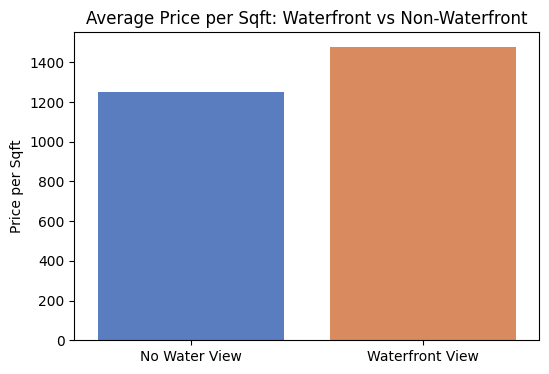

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="view_of_water", y="price_per_sqft", palette="muted", ci=None)
plt.xticks([0,1], ["No Water View", "Waterfront View"])
plt.title("Average Price per Sqft: Waterfront vs Non-Waterfront")
plt.xlabel("")
plt.ylabel("Price per Sqft")
plt.show()


### Interpretation of Waterfront View Hypothesis Test

We tested whether properties with a waterfront view sell for a higher price per square meter.

Hypotheses:
- H₀: The mean price per square meter is the same for properties with and without a waterfront view.
- H₁: The mean price per square meter is different for the two groups.

Result:
The t-test gave t = 6.71 and p ≈ 3.1e-11, which is far below 0.05.  
The average price per square meter is about 1477 with a waterfront view, compared to 1249 without.

Conclusion:
We reject H₀. Properties with a waterfront view have a significantly higher price per square meter, confirming that location-specific amenities strongly influence prices.


### Interpretation of the Chart


The chart shows that properties with a waterfront view are on average more expensive per square foot than those without.  
This visual difference matches the hypothesis test, which confirmed the effect is statistically significant.


---



---



### Visualization: Predicted vs Actual Price per Sqft

We plot the predicted values from the regression model against the actual observed prices.  
A good model should have points close to the diagonal line.


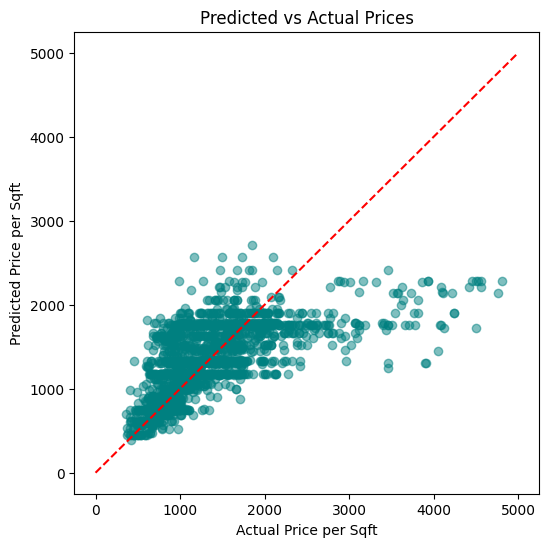

In [ ]:
# Get predicted values
df['predicted_price'] = multi_model.fittedvalues

plt.figure(figsize=(6,6))
plt.scatter(df['price_per_sqft'], df['predicted_price'], alpha=0.5, color="teal")
plt.plot([0,5000],[0,5000], color="red", linestyle="--")  # 45-degree reference line
plt.xlabel("Actual Price per Sqft")
plt.ylabel("Predicted Price per Sqft")
plt.title("Predicted vs Actual Prices")
plt.show()


### Interpretation

The regression model explains the general pattern well, but struggles with ultra-luxury properties.  
For most homes, predicted and actual values are close to the diagonal.  
At the high end, the model underestimates prices, which shows the strong influence of rare outliers.  
This is consistent with the earlier finding that trimming the top 1% changes the results.
